# C964 Capstone Machine Learning Project - Noah Koebe - MPG Prediction

# Import Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import messagebox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Load The Dataset

In [38]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Preproccessing 

In [39]:
dff = mpg

dff['horsepower'] = dff['horsepower'].fillna(0)
dff = dff.drop(['name'], axis=1)
dff = dff.drop(['origin'], axis=1)
dff = dff.drop(['model_year'], axis=1)

dff.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


# Visualizations

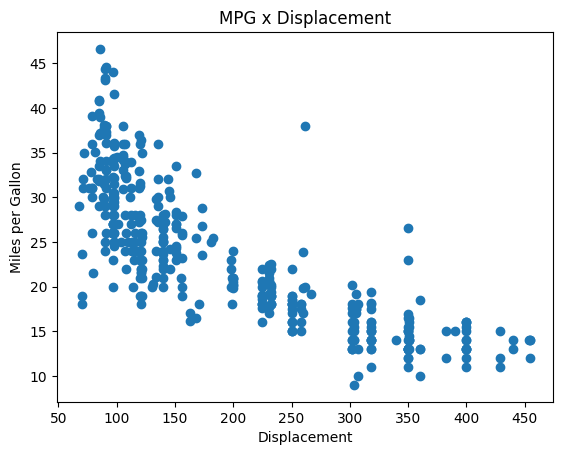

In [40]:
# Scatterplot of MPG vs Displacement
plt.scatter(mpg['displacement'], mpg['mpg'])
plt.title('MPG x Displacement')
plt.ylabel('Miles per Gallon')
plt.xlabel('Displacement')
plt.show()

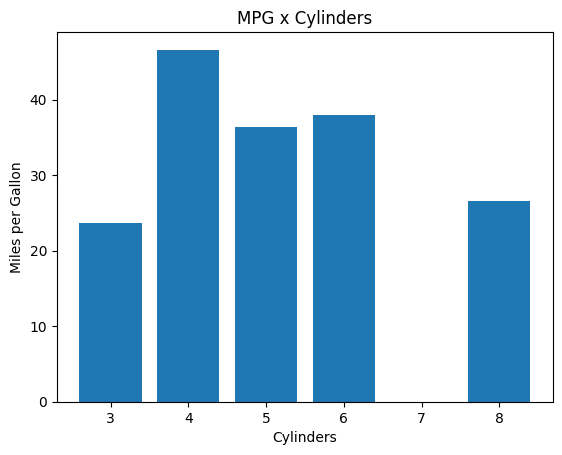

In [41]:
#Bar plot of MPG vs Cylinders
plt.bar(mpg['cylinders'], mpg['mpg'])
plt.title('MPG x Cylinders')
plt.ylabel('Miles per Gallon')
plt.xlabel('Cylinders')
plt.show()

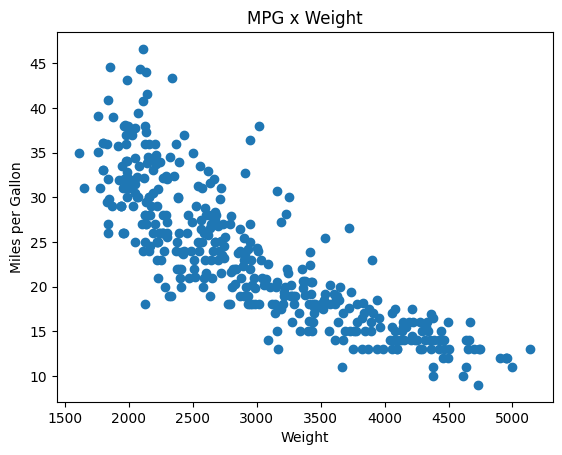

In [42]:
#Scatterplot of MPG vs Weight
plt.scatter(mpg['weight'], mpg['mpg'])
plt.title('MPG x Weight')
plt.ylabel('Miles per Gallon')
plt.xlabel('Weight')
plt.show()

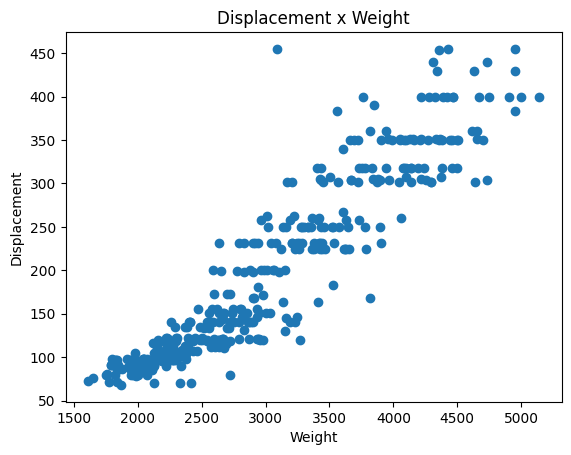

In [43]:
# Scatter plot of Weight vs Displacement
plt.scatter(mpg['weight'], mpg['displacement'])
plt.title('Displacement x Weight')
plt.ylabel('Displacement')
plt.xlabel('Weight')
plt.show()

# Model Declaration, Training, Testing

In [44]:
# Choose Features and target
X = dff.drop(['mpg'], axis=1)
y = dff['mpg']

# Declare Model
first_model = LinearRegression()

# Train and Fit Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
first_model.fit(X_train, y_train)

# Make Prediction
predicts = first_model.predict(X_test)

# Check accuracy (MSE)
print('MSE is: ' + str(mean_squared_error(y_test, predicts)))


MSE is: 12.334798847705821


# Function to calculate prediction when Submit is pressed

In [45]:
# Function when Submit Button is clicked in Window
# Check to make sure each input box has an appropriate input
# Take inputs and assign to numpy array, make prediction
# Display Prediction and Visual

def calc_pred ():
    
    # Check to make sure all inputs fall within expected range
    try: 
        if cyl_combo_box.get() not in ['3', '4', '5', '6', '8']:
            messagebox.showwarning("Error", "Please choose a number from the dropdown options for number of Cylinders")
            return
    
        elif int(disp_input.get()) not in range(50, 600):
            messagebox.showwarning("Error", "For Displacement, please choose a number in the range of 50 to 600")
            return
    
        elif int(hp_input.get()) not in range(5, 350):
            messagebox.showwarning("Error", "For Horsepower, please choose a number in the range of 5 to 350")
            return
    
        elif int(weight_input.get()) not in range(1000, 6500):
            messagebox.showwarning("Error", "For Weight, please choose a number in the range of 1000 to 6500")
            return
    
        elif int(accel_input.get()) not in range(1, 50):
            messagebox.showwarning("Error", "For Acceleration, please choose a number in the range of 1 to 50")
            return

    # Make Prediction with user input
        user_inputs = np.array([[int(cyl_combo_box.get()), float(disp_input.get()), float(hp_input.get()), int(weight_input.get()), float(accel_input.get())]])
        new_pred = first_model.predict(user_inputs)
    except:
        messagebox.showwarning("Error", "Please Enter a number for each feature - words and symbols are not allowed")
        return

    
    # Display Prediction for user
    mpg_pred_variable = new_pred[0]
    pred_label = Label(window, text=('This car design should expect to have an MPG of: ' + str(mpg_pred_variable)))
    pred_label.grid(row = 8, column = 3, pady = 2)


    return 


# User Interface

In [46]:
window = tk.Tk()
window.title('MPG Predictor')
window.geometry('1000x500')

# Submit Button
submit_button = Button(window, text='Submit', command=calc_pred)
submit_button.place(x=450,y=50)

# Choice Box for Cylinders
cyl_choices = [8, 6, 5, 4, 3]
cyl_label = Label(window, text="Cylinders")
cyl_label.grid(row = 4, column = 0, sticky = W, pady = 2)
cyl_combo_box = ttk.Combobox(window, values=cyl_choices)
cyl_combo_box.grid(row = 4, column = 1, pady = 2)


# Text Box for Displacement
disp_label = Label(window, text='Displacement:')
disp_label.grid(row = 0, column = 0, sticky = W, pady = 2)
disp_input = Entry(window)
disp_input.grid(row = 0, column = 1, pady = 2)


# Text Box for Horsepower
hp_label = Label(window, text='Horsepower:')
hp_label.grid(row = 1, column = 0, sticky = W, pady = 2)
hp_input = Entry(window)
hp_input.grid(row = 1, column = 1, pady = 2)


# Text Box for Weight
weight_label = Label(window, text='Weight:')
weight_label.grid(row = 2, column = 0, sticky = W, pady = 2)
weight_input = Entry(window)
weight_input.grid(row = 2, column = 1, pady = 2)


# Text Box for Acceleration
accel_label = Label(window, text='Acceleration:')
accel_label.grid(row = 3, column = 0, sticky = W, pady = 2)
accel_input = Entry(window)
accel_input.grid(row = 3, column = 1, pady = 2)


# Visual describing prediction (Box Plot of this pred vs MPG averages for each cylinder number



window.mainloop()